<a href="https://colab.research.google.com/github/Prasannark48/Capstone_Project_04_Zomato-Restaurant-and-Clustering-analysis/blob/main/Zomato_Restaurant_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

##**Outline of the Project :**

1. Problem Statement
2. Data Summary
3. Data Preparation
4. EDA
5. Feature Engineering
6. Model Training
7. ML Model Building
8. Hyper parameter Tuning

# **Problem Statement**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [210]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from wordcloud import WordCloud
import pandas as pd
from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, add, concatenate
from keras.layers import CuDNNLSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing import text, sequence
from keras.utils import to_categorical
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

###Mounting the drive

In [211]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [212]:
# Load Dataset
restaurant_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Projects/Zomato Restaurant/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Projects/Zomato Restaurant/Zomato Restaurant reviews.csv')

### Dataset First View

In [213]:
# Dataset First Look
restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [214]:
# Dataset First Look
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [215]:
# Dataset Rows & Columns count
restaurant_df.shape

(105, 6)

In [216]:
review_df.shape

(10000, 7)

There are 105 rows and 6 columns present in the restaurant dataset and 10000 rows and 7 columns present in review dataset.

### Dataset Information

In [217]:
# Dataset Info
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [218]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [219]:
# Dataset Duplicate Value Count
restaurant_df.duplicated().sum()

0

In [220]:
review_df.duplicated().sum()

36

So, No duplicate values we found in restaurant dataset.But,36 duplicate values found in review dataset.

#### Missing Values/Null Values

In [221]:
# Missing Values/Null Values Count
restaurant_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [222]:
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

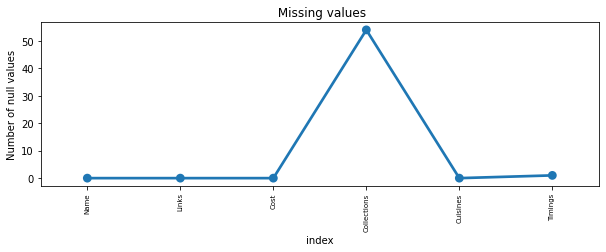

In [223]:
# Visualizing the missing values
missing = pd.DataFrame(restaurant_df.isnull().sum()).reset_index()
plt.figure(figsize=(10,3))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title(" Missing values")
plt.ylabel("Number of null values")
plt.show()
 

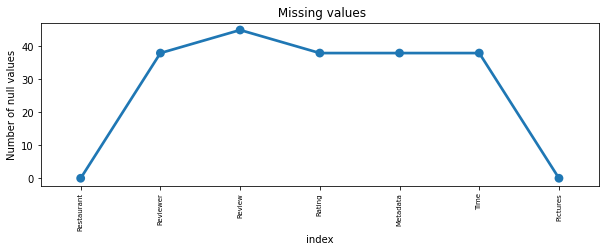

In [224]:
# Visualizing the missing values
missing1 = pd.DataFrame(review_df.isnull().sum()).reset_index()
plt.figure(figsize=(10,3))
ax = sns.pointplot('index',0,data=missing1)
plt.xticks(rotation =90,fontsize =7)
plt.title(" Missing values")
plt.ylabel("Number of null values")
plt.show()

### What did you know about your dataset?

The given dataset has total 105 rows and 6 columns present in the restaurant dataset and 10000 rows and 7 columns present in review dataset. No duplicate values we found in restaurant dataset.But,36 duplicate values found in review dataset. There were many null values found in both dataset.

## ***2. Understanding Your Variables***

In [225]:
# Dataset Columns
restaurant_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [226]:
review_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [227]:
# Dataset Describe
restaurant_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [228]:
# Dataset Describe
review_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description 

**Zomato Restaurant names and Metadata**

Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

**Zomato Restaurant reviews**

Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [229]:
# Check Unique Values for each variable.
restaurant_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [230]:
# Check Unique Values for each variable.
review_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [231]:
# Changing cost function's data type
restaurant_df['Cost'] =  restaurant_df['Cost'].str.replace(",","").astype('int64')


In [232]:
# Write your code to make your dataset analysis ready.
restaurant_df1=restaurant_df.copy()
top_10_costliest_restaurant = restaurant_df1[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)
top_10_costliest_restaurant

,Name,Cost
23,Collage - Hyatt Hyderabad Gachibowli,2800
35,Feast - Sheraton Hyderabad Hotel,2500
0,10 Downing Street,1900
48,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
20,Cascade - Radisson Hyderabad Hitec City,1800
102,Zega - Sheraton Hyderabad Hotel,1750
74,Republic Of Noodles - Lemon Tree Hotel,1700
60,Mazzo - Marriott Executive Apartments,1700
14,Barbeque Nation,1600
9,Arena Eleven,1600


(-0.5, 1399.5, 1399.5, -0.5)

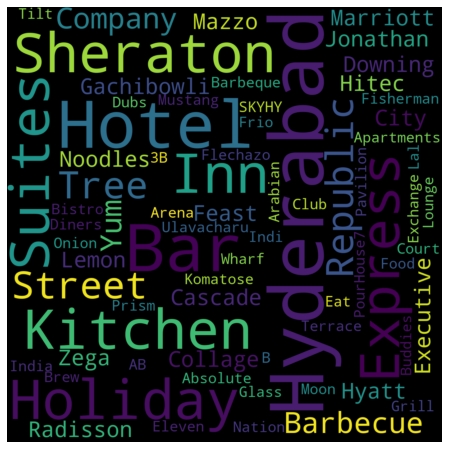

In [233]:
#Creating word cloud for expensive restaurants
plt.figure(figsize=(15,8))
text = " ".join(name for name in restaurant_df1.sort_values('Cost',ascending=False).Name[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [234]:
#converting rating into float
review_df.loc[review_df['Rating'] == 'Like'] = np.nan
review_df['Rating']= review_df['Rating'].astype('float64')

In [235]:
print(review_df['Rating'].mean())

3.601044071880333


In [236]:
#filling the null values with average value of rating
review_df['Rating'].fillna(3.6, inplace=True)

In [237]:
# split metadata column into 2 columns i.e. Reviews and followers
review_df['Reviews'],review_df['Followers']= review_df['Metadata'].str.split(',').str
review_df['Reviews'] = pd.to_numeric(review_df['Reviews'].str.split(' ').str[0])

In [238]:
review_df['Followers']= pd.to_numeric(review_df['Followers'].str.split(' ').str[1])

In [239]:
review_df.isnull().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Metadata        39
Time            39
Pictures         1
Reviews         39
Followers     1617
dtype: int64

In [240]:
review_df.shape

(10000, 9)

In [241]:
# Replace null values with 0 and convert column to int data type
review_df["Followers"] = review_df["Followers"].replace(np.nan, 0)
review_df["Followers"] = review_df["Followers"].astype("int")
review_df["Reviews"] = review_df["Reviews"].replace(np.nan, 0)
review_df["Reviews"] = review_df["Reviews"].astype("int")

In [242]:
# Converting Time column into Time, Year, Month, Hour
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour
review_df = review_df.drop(['Metadata'], axis =1)

In [243]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1,2,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3,2,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2,3,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1,1,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3,2,2019.0,5.0,21.0


In [244]:
# we can drop the remaining missing data
review_df.dropna(inplace=True)

In [245]:
review_df.reset_index(inplace = True)
review_df.isnull().sum()

index         0
Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

### What all manipulations have you done and insights you found?

Grouping the cost and name of the restaurants to see the expensive and cheap restaurant.Collage - Hyatt Hyderabad Gachibowli with	2800INR
Feast - Sheraton Hyderabad Hotel with	2500INR are the top expensive restaurants .Creating word cloud for expensive restaurants like Hyderbad,BAR,Kitchen and many restaurant names can be seen.Splitting metadata column into 2 columns i.e. Reviews and followers. Converting Time column into Time, Year, Month, Hour is done.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 **Top 10 Expensive Restaurants**

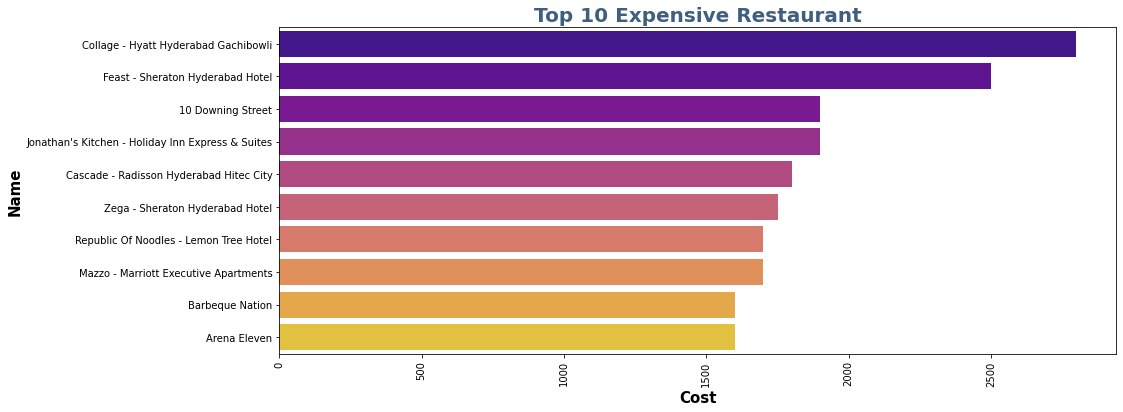

In [246]:
# Chart - 1 visualization code
# Top 10 Expensive Restaurants
plt.figure(figsize=(15,6))
x = top_10_costliest_restaurant['Cost']
y = top_10_costliest_restaurant['Name']
plt.title("Top 10 Expensive Restaurant",fontsize=20,weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

From the graph it depicts top ten expensive restaurants in the given dataset.Collage-hytt hyderabad is a number one expensive resturant among all others with the cost of more than 2500INR.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are top 10 restaurants in a city which are very much expensive than others.So, Rich people can afford and taking the food orders from here.But poor and average customers cannot afford that much amount but, they will order with average cost like 1500INR is a better one from 10 down street and johnson's kitchen.This will impact the business in a positive way.

#### Chart - 2 **Cheap and Affordable Restaurant**

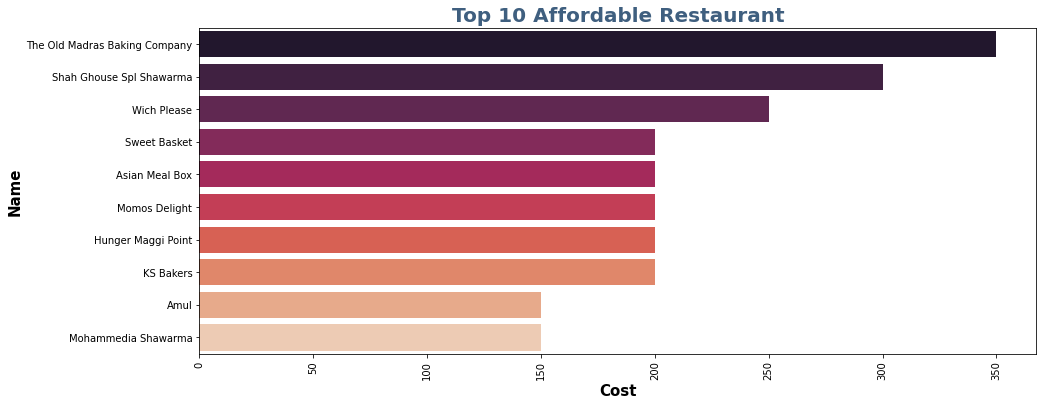

In [247]:
# Chart - 2 visualization code
# Affordable price restaurants
plt.figure(figsize=(15,6))
top_10_affor_rest=restaurant_df1[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).tail(10)
x = top_10_affor_rest['Cost']
y = top_10_affor_rest['Name']
plt.title("Top 10 Affordable Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rocket')
plt.show()

##### 1. Why did you pick the specific chart?

ar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

From the graph it depicts top ten cheap restaurants in the given dataset.mohammedia shawarma is a number one cheap resturant among all others with the cost of more than 150INR.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are top 10 restaurants in a city which are very much cheap than others.So, Rich people cannot afford and taking the food orders from here.But poor and average customers can afford that much amount but, they will order with average cost like 400INR is a better one from the old madras baking company.This will impact the business in a positive way.But food is quite good but not a best one.

#### Chart - 3 **Top Rated Restaurants**

In [248]:
# Remove Row which has Rating = Like as it is has just one
review_df = review_df[review_df["Rating"] != "Like"]
review_df["Rating"].value_counts()

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [249]:
# Convert Rating Data Type to float
review_df["Rating"] = review_df["Rating"].astype("float")

In [250]:
Top_Rated_Restaurant = review_df.groupby("Restaurant")["Rating"].agg("mean").to_frame().reset_index().sort_values(by = "Rating", ascending = False).head(10)

[Text(0.5, 1.0, '10_Top_Rated_Restaurants.png')]

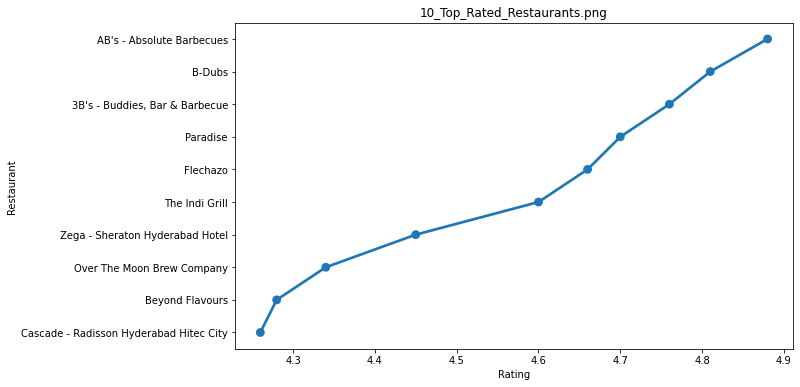

In [251]:
# Chart - 3 visualization code
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=Top_Rated_Restaurant,x='Rating',y='Restaurant',ax=ax)
ax.set(title='10_Top_Rated_Restaurants.png')

##### 1. Why did you pick the specific chart?

Seaborn Line Plots depict the relationship between continuous as well as categorical values in a continuous data point format.

##### 2. What is/are the insight(s) found from the chart?

From the plot it depicts top ten rated restaurants in the given dataset.This gives more information than cost.AB's- Absolute Barbeques is a number one rated resturant among all others with the rating of 4.9.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are top 10 restaurants in a city which are highly rated than others.So, customers give rating according to the food taste preferably, serving staff,place. Rating will decides the quality of resturant.SO, high rating can impact business in positive growth and low rating leads to negative growth.

#### Chart - 4 **Top Reviewed Restaurants**

In [252]:
top_reviewed_restaurant = review_df[['Restaurant','Reviews']].groupby('Restaurant',as_index=False).sum().sort_values(by='Reviews',ascending=False).head(10)

[Text(0.5, 1.0, 'top_reviewed_restaurant.png')]

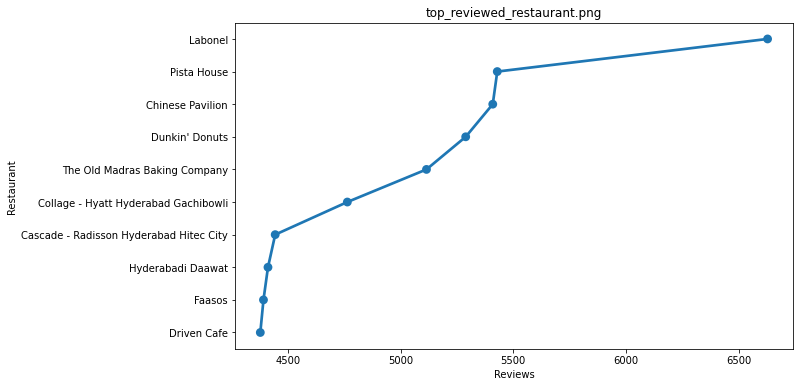

In [253]:
# Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=top_reviewed_restaurant,x='Reviews',y='Restaurant',ax=ax)
ax.set(title='top_reviewed_restaurant.png')

##### 1. Why did you pick the specific chart?

Seaborn Line Plots depict the relationship between continuous as well as categorical values in a continuous data point format.

##### 2. What is/are the insight(s) found from the chart?

From the plot it depicts top reviewd restaurants in the given dataset.This gives information about the good and bad analysis by the customers.Labonel is a highest reviewd resturant. We dont know whether it gots good reviews or bad reviews.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are top 10 reviewd restaurants  in a city which are highly rated than others.If reviews got good than it impacts a positive growth in a business.Here review feature is a deciding factor of quality of food and others.

#### Chart - 5 **Top Followed Restaurants**

In [254]:
top_followed_restaurant = review_df[['Restaurant','Followers']].groupby('Restaurant',as_index=False).sum().sort_values(by='Followers',ascending=False).head(10)

[Text(0.5, 1.0, 'top_followed_restaurant.png')]

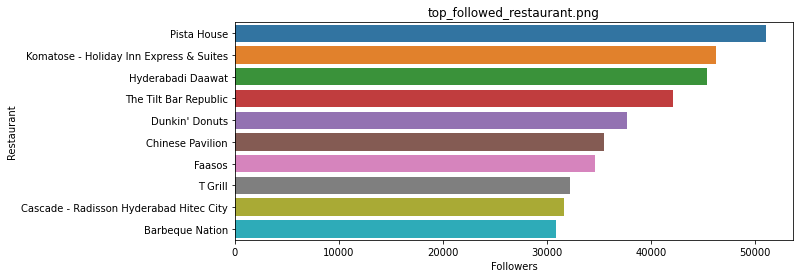

In [255]:
# Chart - 5 visualization code
fig,ax=plt.subplots(figsize=(10,4))
sns.barplot(data=top_followed_restaurant,x='Followers',y='Restaurant',ax=ax)
ax.set(title='top_followed_restaurant.png')

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

##### 2. What is/are the insight(s) found from the chart?

From the graph we get Pista House is a number one followed restaurant with 50000 followed.SO, I think this restaurant is a good choice for the customers to make order from here and Cascade- Radisson Hyderabad also a good choice because of rating of 4.3 and most reviewd restaurant.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are top 10 followed restaurants in a city.These resturants are of good category i guess because of most reviewd and more than 4 ratings were given by the customers.Beacuse of this customers are liked and followed the restaurants.So, this will make business to go in a positive way.

#### Chart - 6 **Number of Reviews per every hour**

In [256]:
# Review per hour
reviews_hour = review_df.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')

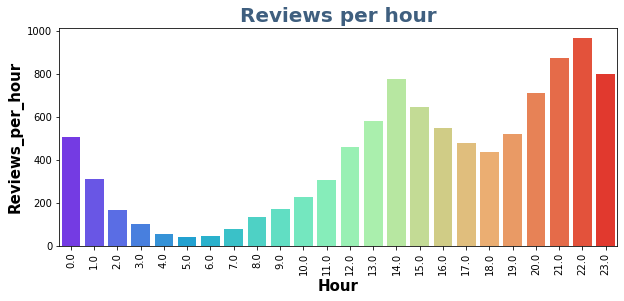

In [257]:
# Chart - 6 visualization code
# plotting reviews per hour
plt.figure(figsize=(10,4))
x = reviews_hour['Hour']
y = reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

From the graph it shows that during afternoon and night the review got high because of number of orders are very high.During morning due to work hours customers won't order any breakfast. They likely to order full meals during lunch and dinner time. Between 9-10pm reviews are in peak level.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

During morning hours customers order very less due to their working hours.But afternoon and dinner times are best choice by the customers to make order.This will make positive growth but if zomato offers discount and a good breakfast items from a good restaurants then customers might order during morning hours also.

#### Chart - 7 **In which month number of reviews got more?**

5.0     1541
7.0     1326
4.0     1247
3.0     1065
2.0      719
8.0      675
1.0      652
9.0      645
10.0     629
12.0     594
11.0     569
6.0      292
Name: Month, dtype: int64
 


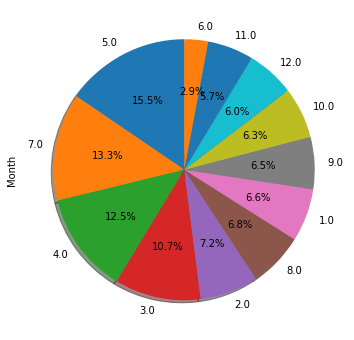

In [258]:
# Chart - 7 visualization code
print(review_df.Month.value_counts())
print(" ")
review_df['Month'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True, 
                              )

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in our data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the Months.

##### 2. What is/are the insight(s) found from the chart?

From the chart we get there is a 15.5% of reviews in the month of may and 13.3% in july. Very less in june and november.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

May and july are the months which has both summer and rainy season. During this people won't go outside for to buy foods. So, they will order by online and enjoys their food. This makes positive growth but for other months also zomato can improve their delivery by incresing their staff.

#### Chart - 8 **Yearlywise reviews**

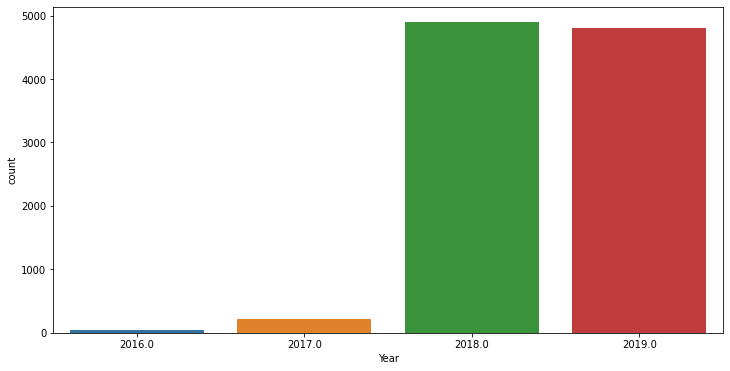

In [259]:
# Chart - 8 visualization code
plt.figure(figsize=(12,6))
sns.countplot(review_df.Year)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

From this grpah it shows that in the year of 2018 and 2019 got highest reviews because in a give dataset customers ordered more during these years.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yearly wise zomato improving its capability and psoitive growth in a business by giving delivering the satisfacting food items to their door steps.

#### Chart - 9 **Top 10 reviewers**

In [260]:
#top reviewers list
reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:10]
top_reviewers.head()

,Reviewer,Review_Count
654,Ankita,13
3855,Parijat Ray,13
2652,Kiran,12
7009,Vedant Killa,11
2311,Jay Mehta,11


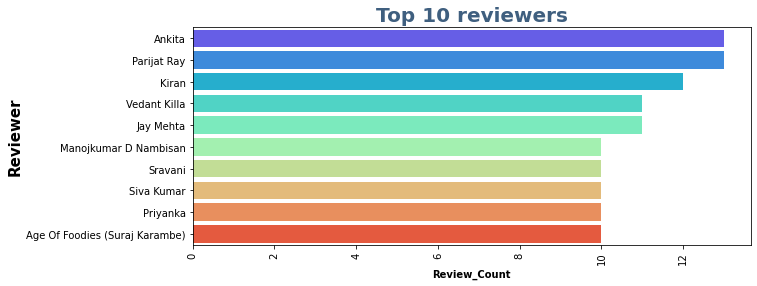

In [261]:
# Chart - 9 visualization code
# top reviewers that have more review
plt.figure(figsize=(10,4))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 10 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=10)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

Graph shows that Ankita and Parijat ray made a hightest number of reviews among all the customers.Because, These customers liking outside food more than home food and they are ordering more in a online mode.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These reviewers are very much important because these customers are a deciding factor for other customers to make order from which restaurant and which cuisines.More the reviews by these customers more the benefit for the restaurants and zomato company.

###**Merging two datasets and Finding North Indian, Chinese and South Indian food options and ratings**

In [262]:
#crating rating into numeric values
review_df['Rating']=pd.to_numeric(review_df['Rating'],errors='coerce')

In [263]:
#merging the both resturant and review datatset
avg_rating=review_df.groupby('Restaurant',as_index=False)['Rating'].mean()
merged=restaurant_df1.merge(avg_rating, how='inner',left_on='Name',right_on='Restaurant')

In [264]:
#view of merged dataset
merged.head()

,Name,Links,Cost,Collections,Cuisines,Timings,Restaurant,Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,4.28
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,Paradise,4.70
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",Flechazo,4.66
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,Shah Ghouse Hotel & Restaurant,3.21
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",Over The Moon Brew Company,4.34


In [265]:
#creating different food style like north, south and chinese
merged["North_indian"]= merged["Cuisines"].str.find("North Indian")  
merged["Chinese"]=merged["Cuisines"].str.find("Chinese")
merged["South_Indian"]=merged["Cuisines"].str.find("South Indian")

In [266]:
#viewing the all three type of food style by using loc
merged.loc[merged['North_indian'] == -1, 'North_Indian_menu'] = 0
merged.loc[merged['North_indian'] > -1, 'North_Indian_menu'] = 1
merged.loc[merged['Chinese'] == -1, 'Chinese_menu'] = 0
merged.loc[merged['Chinese'] > -1, 'Chinese_menu'] = 1
merged.loc[merged['South_Indian'] == -1, 'South_Indian_menu'] = 0
merged.loc[merged['South_Indian'] > -1, 'South_Indian_menu'] = 1

In [267]:
#grouping the north food type with cost and rating
North=merged[merged['North_Indian_menu'] == 1]
mean_rating_N=North.groupby(['Name','Cost'],as_index=False).Rating.mean()

#### Chart - 10

In [268]:
# Chart - 10 visualization code
import plotly.express as px
fig = px.bar(mean_rating_N, x="Name", y="Cost",color="Rating")
fig.update_xaxes(ticks="outside", tickwidth=1, tickcolor='crimson',tickangle=45, ticklen=10)
fig.update_layout(title_text="North Indian restaurant cost vs rating")
fig.show()

In [269]:
#grouping the south food type with cost and rating
South=merged[merged['South_Indian_menu'] == 1]
mean_rating_S=South.groupby(['Name','Cost'],as_index=False).Rating.mean()
fig = px.bar(mean_rating_S, x="Name", y="Cost",color="Rating")
fig.update_layout(title_text="South Indian restaurant cost vs rating")
fig.update_xaxes(ticks="outside", tickcolor='crimson')
fig.show()

In [270]:
#grouping the chinese food type with cost and rating
Chinese=merged[merged['Chinese_menu'] == 1]
mean_rating_C=Chinese.groupby(['Name','Cost'],as_index=False).Rating.mean()
fig = px.bar(mean_rating_C, x="Name", y="Cost",color="Rating")
fig.update_layout(title_text="Chinese restaurant cost vs rating")
fig.update_xaxes(ticks="outside", tickwidth=1, tickcolor='crimson',tickangle=45, ticklen=10)
fig.show()

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

##### 2. What is/are the insight(s) found from the chart?

From above three graphs we get Collage-hytt hyderabad  is a costliest restaurant with rating of 3.4 and cost is 2800.AB's-Barbecues got 4.9 rating and cost is 1500INR. This looks good in North Indian food style.
In south Indian, Mazzow-Marriaot executive with cost of 1500 and rating is 4.19.Beyond Flavours is a another good restaurant with cost of 800 and rating is 4.28.
In chinese food style, Collage-hytt hyderabad  is a costliest restaurant with rating of 3.4 and cost is 2800 and Paradise is a good restaurant with 4.7 rating and 800INR.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Above mnetioned good resturants making good impact on business because customers are liking those resturants.

#### Chart - 11 **Top 10 reviewers with average rating of review**

In [271]:
# Average of the ratings of reviewers with review count
review_ratings=review_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='AverageRatings')
review_ratings=pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings=review_ratings[:10]
top_reviewers_ratings=top_reviewers_ratings.sort_values(by = 'AverageRatings',ascending=False)
top_reviewers_ratings.head()

,Reviewer,Review_Count,AverageRatings
2,Kiran,12,4.500000
3,Vedant Killa,11,4.000000
6,Sravani,10,4.000000
0,Ankita,13,3.923077
4,Jay Mehta,11,3.727273


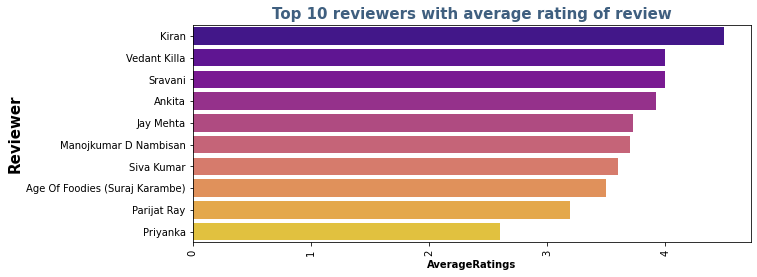

In [272]:
# Chart - 11 visualization code
# Average rating of top reviewers
plt.figure(figsize=(10,4))
x = top_reviewers_ratings['AverageRatings']
y = top_reviewers_ratings['Reviewer']
plt.title("Top 10 reviewers with average rating of review",fontsize=15, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Rating",weight='bold',fontsize=10)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

##### 2. What is/are the insight(s) found from the chart?

Fom this graph we get Kiran and vedant killa are a top rater among others.These guys were giving more than 4 rating whenever they orders.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These customers are important because they are giving honest ratings and they know the which restaurant is a good choice and which one is a bad.

#### Chart - 12 **3d plot for finding pattern between review length , rating and number of review**

In [273]:
#creating new variable review length to see if length of review impacts the ratings
review_df['Review']=review_df['Review'].astype(str)
review_df['Review_length'] = review_df['Review'].apply(len)

In [274]:
# Chart - 12 visualization code
import plotly.express as px
plt.figure(figsize=(10,4))
fig = px.scatter_3d(review_df, x='Review_length', y='Reviews', z='Rating')
fig.update_layout(title_text="Review Length vs Rating vs Number of Reviews ")
fig.show()

<Figure size 720x288 with 0 Axes>

##### 1. Why did you pick the specific chart?

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples.These can be created using the ax.plot3D and ax.scatter3D functions. 

##### 2. What is/are the insight(s) found from the chart?

The plot suggest that very lengthy reviews have either very high ratings or very ratings. Average reviews have very small length of review.Number of reviews do not show much impact on ratings

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The plot suggest that very lengthy reviews have either very high ratings or very ratings. Average reviews have very small length of review.

#### Chart - 13 **Poeple who reviewed > 300 times, Their orders and ratings**

In [275]:
reviewer_rating=review_df.groupby(['Reviewer'],as_index=False).Rating.mean()
merged2=reviewer_rating.merge(review_df[['Reviewer','Reviews']],how='left',left_on='Reviewer',right_on='Reviewer')
merged2=merged2.drop_duplicates()
merged2['Reviews']=merged2['Reviews'].fillna(0)
merged2['Reviews']=merged2['Reviews'].astype(int)
reveiwer_300=merged2[merged2['Reviews']>300]

In [276]:
# Chart - 13 visualization code
fig = px.scatter_matrix(reveiwer_300,dimensions=["Reviews", "Rating"], color="Reviewer")
fig.update_layout(title_text="Total Reviews vs Ratings for 300+ reviewers ")
fig.show()

##### 1. Why did you pick the specific chart?

A scatter plot displays data between two continuous data. It shows how one data variable affects the other variable. A scatter plot can display data in different types of plots, both 2D and 3D.

##### 2. What is/are the insight(s) found from the chart?

Two people in particular have rated every restuarant very poorly, while person who have most reviews gives average ratings to every restuarant.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Above mentioned type of a person creating to help business to get insights from all the restaurants.

#### Chart - 14 - Correlation Heatmap

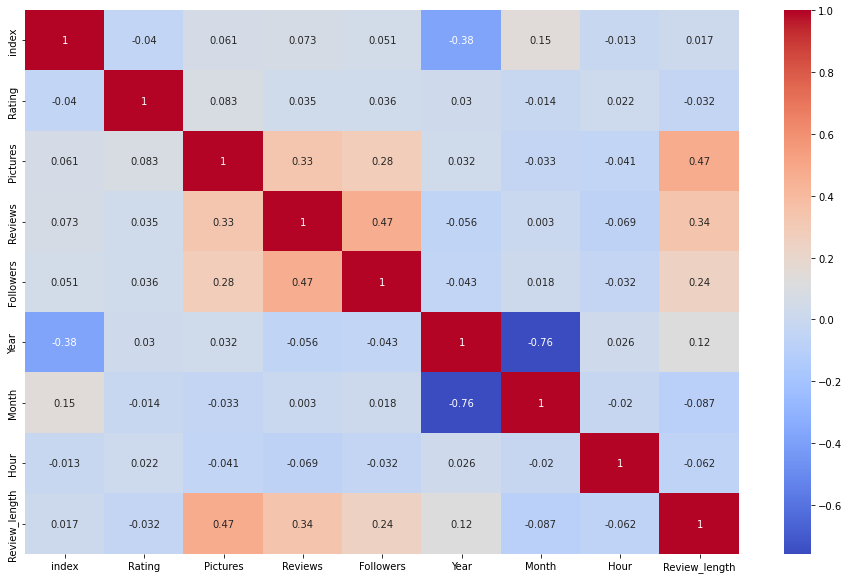

In [277]:
# Correlation Heatmap visualization code
plt.figure(figsize=(16,10))
sns.heatmap(review_df.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

As seen from heatmap, we got both reviews and followers are highly correlated to each other. Rating also slightly correlated bit. SO, Reviews can be taken as one important factor to decide whether customer is liking the food in the resturant or not. Sameway rating also decides the taste of the customers.

Rest all correlation can be depicted from the above chart.

#### Chart - 15 - Pair Plot 

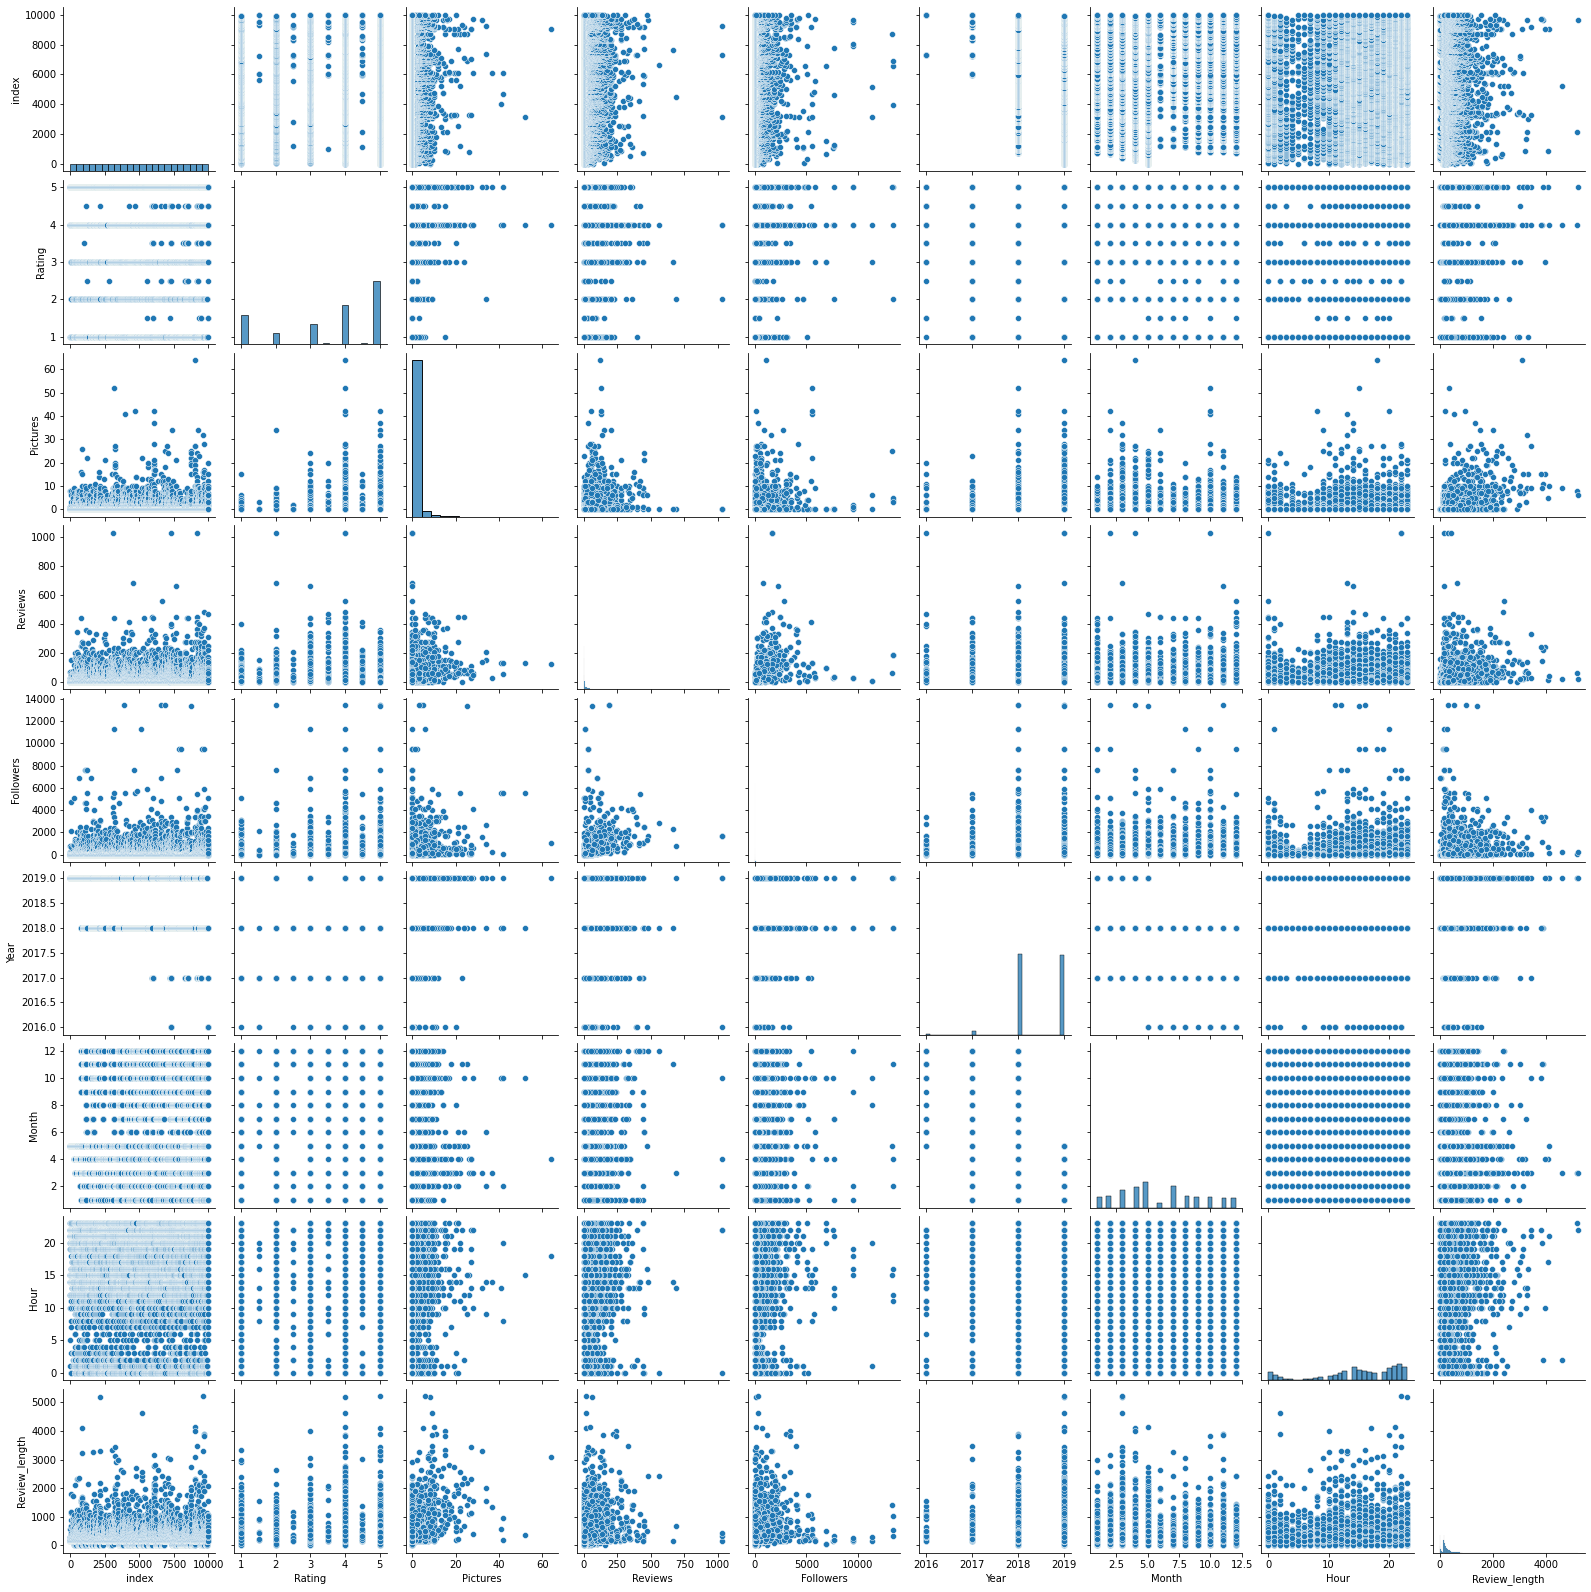

In [278]:
# Pair Plot visualization code
# Pair Plot visualization code
sns.pairplot(review_df)

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are less linear relationship between variables and data poiunts aren't linearly separable. reviews,followers,rating data are clusetered and ovearlapped each other. 
Rest insights can be depicted from the above graph.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [279]:
# Creating a copy of the dataset for further feature engineering
final_rest_df=restaurant_df.copy()

In [280]:
# Handling Missing Values & Missing Value Imputation
final_rest_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [281]:
# we can drop the remaining missing data
final_rest_df.dropna(inplace=True)

In [282]:
final_rest_df.isnull().sum()

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

In [283]:
review_df.shape

(9954, 13)

In [284]:
# Replacing followers and reviews null values into 0
review_df['Followers'].fillna(0,inplace=True)
review_df['Reviews'].fillna(0,inplace=True)

In [285]:
# we can drop the remaining missing data
review_df.dropna(inplace=True)

In [286]:
review_df.isnull().sum()

index            0
Restaurant       0
Reviewer         0
Review           0
Rating           0
Time             0
Pictures         0
Reviews          0
Followers        0
Year             0
Month            0
Hour             0
Review_length    0
dtype: int64

In [287]:
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour,Review_length
0,0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1,2,2019.0,5.0,15.0,222
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3,2,2019.0,5.0,14.0,144
2,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2,3,2019.0,5.0,22.0,189
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1,1,2019.0,5.0,22.0,148
4,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3,2,2019.0,5.0,21.0,160


#### What all missing value imputation techniques have you used and why did you use those techniques?

For Replacing followers and reviews null values into 0. because those are in very high number and collections null values are dropped from restaurant dataset. Other columns in review datase which are in less number of null values were dropped.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 3. Removing Punctuations

In [288]:
#viewing and assigning the reviews column to review 
review= review_df.Review
review

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9949    Madhumathi Mahajan Well to start with nice cou...
9950    This place has never disappointed us.. The foo...
9951    Bad rating is mainly because of "Chicken Bone ...
9952    I personally love and prefer Chinese Food. Had...
9953    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [289]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [290]:
final_rest_df['Cuisines'] = final_rest_df['Cuisines'].apply(lambda x: remove_punctuation(x))
final_rest_df['Cuisines'].head()

0    Chinese Continental Kebab European South India...
1                         Biryani North Indian Chinese
2            Asian Mediterranean North Indian Desserts
3       Biryani North Indian Chinese Seafood Beverages
4    Asian Continental North Indian Chinese Mediter...
Name: Cuisines, dtype: object

In [291]:
#removing the punctuations from review dataset
review_df['Review'] = review_df['Review'].apply(remove_punctuation)

In [292]:
##cleaning the repeating characters
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [293]:
final_rest_df['Cuisines'] = final_rest_df['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
final_rest_df['Cuisines'].head()

0    Chinese Continental Kebab European South India...
1                         Biryani North Indian Chinese
2            Asian Mediterranean North Indian Desserts
3       Biryani North Indian Chinese Seafood Beverages
4    Asian Continental North Indian Chinese Mediter...
Name: Cuisines, dtype: object

Removed all punctuations and repeatating words from given datasets.

#### 4. Removing URLs & Removing words and digits contain digits.

In [294]:
## Removal of urls
final_rest_df=final_rest_df.drop(['Links'],axis=1)
final_rest_df.head()

,Name,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...",Chinese Continental Kebab European South India...,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,Hyderabad's Hottest,Biryani North Indian Chinese,11 AM to 11 PM
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest",Asian Mediterranean North Indian Desserts,"11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,Biryani North Indian Chinese Seafood Beverages,12 Noon to 2 AM
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...",Asian Continental North Indian Chinese Mediter...,"12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [295]:
# Remove URLs & Remove words and digits contain digits
#cleaning the numbers present in the text
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [296]:
final_rest_df['Cuisines'] = final_rest_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
final_rest_df['Cuisines'].head()

0    Chinese Continental Kebab European South India...
1                         Biryani North Indian Chinese
2            Asian Mediterranean North Indian Desserts
3       Biryani North Indian Chinese Seafood Beverages
4    Asian Continental North Indian Chinese Mediter...
Name: Cuisines, dtype: object

All url and numbers are removed from the given datasets.

#### 5. Removing Stopwords & Removing White spaces

In [297]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [298]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [299]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [300]:
# Removing stopwords from Cuisines
final_rest_df['Cuisines'] = final_rest_df['Cuisines'].apply(lambda text: stopwords(text))
final_rest_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [301]:
#removing the stopwaords from review dataset
review_df['Review'] = review_df['Review'].apply(stopwords)

In [302]:
review=review_df.Review
review

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9949    madhumathi mahajan well start nice courteous s...
9950    place never disappointed us food courteous sta...
9951    bad rating mainly chicken bone found veg food ...
9952    personally love prefer chinese food couple tim...
9953    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9954, dtype: object

In [303]:
# remove_all_extra_spaces
def remove_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text

In [304]:
review=remove_spaces(review)

Removed all white spaces and stopwords present in english in the given datasets.

#### 6. Rephrase Text

In [305]:
# Rephrase Text

#### 7. Tokenization

In [306]:
# Tokenization

#### 8. Text Normalization

In [307]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [308]:
# Normalizing Text using Lemmatization technique
def lemmatization_(text):
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)
  return text

In [309]:
review=lemmatization_(review)

##### Which text normalization technique have you used and why?

I used Lemmatization technique to make text normalize because Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. For instance, stemming the word 'Caring' would return 'Car'.

In [310]:
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [311]:
review=remove_non_leters(review)

In [312]:
# storing the reviews in a feature of df
review_df['Review']=review

In [313]:
#function to removing words greater than 40 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=40])
  return review

In [314]:
#removing words greater than 40 and less than 2
review_df['Review']=review_df['Review'].apply(lambda x:len_less_than2(x))

In [315]:
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour,Review_length
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1,2,2019.0,5.0,15.0,222
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3,2,2019.0,5.0,14.0,144
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2,3,2019.0,5.0,22.0,189
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1,1,2019.0,5.0,22.0,148
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0.0,3,2,2019.0,5.0,21.0,160


#### 9. Part of speech tagging

**POS tagging of negative rated reviews**

POS tagging tags the text to grammar like if its is noun, pronoun, verb ,adjective etc are present in texts:

importing necessary libraries

In [316]:
from nltk.tag import pos_tag
from nltk import pos_tag_sents
nltk.download('averaged_perceptron_tagger')
from sklearn.manifold import TSNE

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [317]:
neg_rev = review_df[review_df.Rating< 3]

Creating a loop that counts pos tags increments tag count of tags, then we plot the number pos tags frequency.

In [318]:
# POS Taging
neg_texts = neg_rev['Review'].str.split().map(pos_tag)
neg_texts.head()
def count_tags(title_with_tags):
    tag_count = {}
    for word, tag in title_with_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return(tag_count)
neg_texts.map(count_tags).head()

14    {'NN': 11, 'VBZ': 1, 'VBP': 3, 'JJR': 1, 'JJ':...
66    {'NN': 11, 'JJ': 4, 'RB': 2, 'VB': 1, 'VBP': 2...
75    {'NN': 28, 'RB': 7, 'JJ': 13, 'NNS': 1, 'VBP':...
79    {'MD': 3, 'VB': 7, 'JJ': 30, 'NN': 52, 'RB': 8...
80                         {'JJ': 8, 'NN': 8, 'VBP': 1}
Name: Review, dtype: object

In [319]:
neg_texts = pd.DataFrame(neg_texts)
neg_texts['tag_counts'] = neg_texts['Review'].map(count_tags)
neg_texts.head()

,Review,tag_counts
14,"[(order, NN), (corn, NN), (cheese, NN), (ball,...","{'NN': 11, 'VBZ': 1, 'VBP': 3, 'JJR': 1, 'JJ':..."
66,"[(team, NN), (lunch, NN), (bad, JJ), (restaura...","{'NN': 11, 'JJ': 4, 'RB': 2, 'VB': 1, 'VBP': 2..."
75,"[(place, NN), (dinner, NN), (day, NN), (back, ...","{'NN': 28, 'RB': 7, 'JJ': 13, 'NNS': 1, 'VBP':..."
79,"[(would, MD), (like, VB), (introduce, VB), (re...","{'MD': 3, 'VB': 7, 'JJ': 30, 'NN': 52, 'RB': 8..."
80,"[(hostile, JJ), (staff, NN), (okeish, JJ), (fo...","{'JJ': 8, 'NN': 8, 'VBP': 1}"


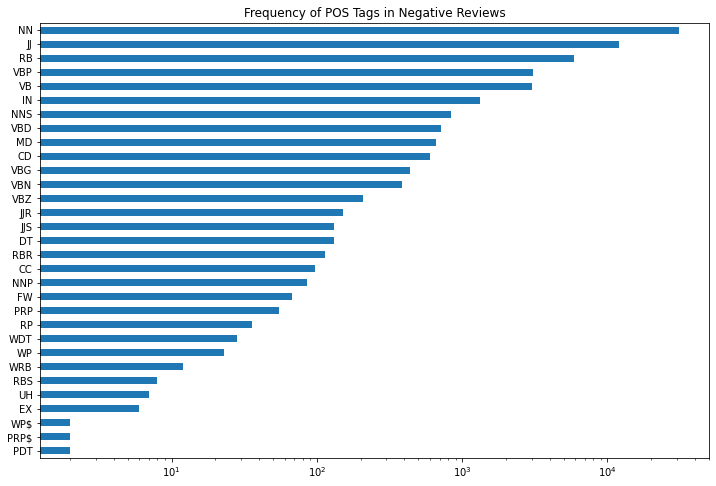

In [320]:
#plotting the tagged set of text
tag_set = list(set([tag for tags in neg_texts['tag_counts'] for tag in tags]))
for tag in tag_set:
    neg_texts[tag] = neg_texts['tag_counts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Negative Reviews'    
neg_texts[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(12,8), title=title)

#### 10. Text Vectorization

In [321]:
# Vectorizing Text
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(review)

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [322]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)
     

Creating a new DataFrame vocab_after_stemming

In [323]:

# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [324]:
#top 15 vocab count
top15_most_ocurred_vocab = vocab_after_stemming.head(15)

In [325]:
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values 
top15_most_occurred_words
     

array(['zyada', 'zucchini', 'zoomato', 'zonequality', 'zoneincrease',
       'zone', 'zomto', 'zomtato', 'zomoto', 'zomos', 'zombie', 'zomatto',
       'zomatowhy', 'zomatothe', 'zomatoo'], dtype=object)

In [326]:
#number of words count
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values 
top15_most_occurred_words_count
     

array([15831, 15830, 15829, 15828, 15827, 15826, 15825, 15824, 15823,
       15822, 15821, 15820, 15819, 15818, 15817])

<BarContainer object of 15 artists>

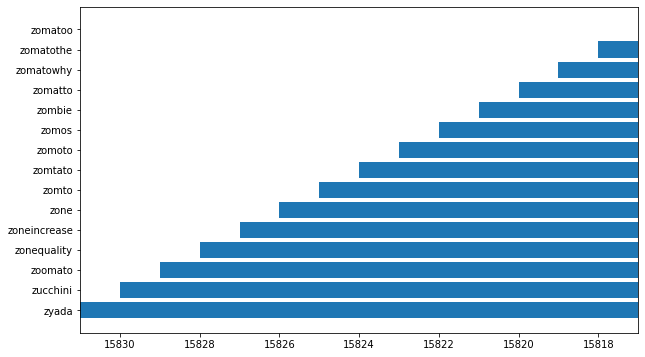

In [327]:
#plot for viewing highest reached word
plt.figure( figsize = ( 10,6 ))
plt.xlim(15831, 15817)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

##### Which text vectorization technique have you used and why?

##**Sentiment Analysis**

###**Sentiment Analysis of review**

In [328]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px


In [329]:
#Create a function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

In [330]:
#Create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

In [331]:
#Create two new columns
review_df['Subjectivity'] = review_df['Review'].apply(subjectivity)
review_df['Polarity'] = review_df['Review'].apply(polarity)

In [332]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [333]:
review_df['Analysis'] = review_df['Polarity'].apply(getAnalysis)

In [334]:
# plot the polarity and subjectivity
fig = px.scatter(review_df, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Analysis',
                 size='Subjectivity')

In [335]:
#add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

The x-axis shows polarity, and y-axis shows subjectivity. Polarity tells how positive or negative the text is. The subjectivity tells how subjective or opinionated the text is

In [336]:
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour,Review_length,Subjectivity,Polarity,Analysis
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1,2,2019.0,5.0,15.0,222,0.720000,0.660000,Positive
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3,2,2019.0,5.0,14.0,144,0.691667,0.708333,Positive
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2,3,2019.0,5.0,22.0,189,0.675000,0.550000,Positive
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1,1,2019.0,5.0,22.0,148,0.675000,0.750000,Positive
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0.0,3,2,2019.0,5.0,21.0,160,0.566667,0.600000,Positive


In [337]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9953
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          9954 non-null   int64         
 1   Restaurant     9954 non-null   object        
 2   Reviewer       9954 non-null   object        
 3   Review         9954 non-null   object        
 4   Rating         9954 non-null   float64       
 5   Time           9954 non-null   datetime64[ns]
 6   Pictures       9954 non-null   float64       
 7   Reviews        9954 non-null   int64         
 8   Followers      9954 non-null   int64         
 9   Year           9954 non-null   float64       
 10  Month          9954 non-null   float64       
 11  Hour           9954 non-null   float64       
 12  Review_length  9954 non-null   int64         
 13  Subjectivity   9954 non-null   float64       
 14  Polarity       9954 non-null   float64       
 15  Analysis       9954 n

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [338]:
# Manipulate Features to minimize feature correlation and create new features
# Converting Analysis into numeric form Postive=1 and Negative =0
def sentiment(rating):
  if rating > 3.0:
    return 1
    # positive sentiment
  else:
    return 0
    # neagative sentiment 


#### 2. Feature Selection

In [339]:
#creating dummies for positive and negative sentiment based on rating
review_df['Analysis']=review_df['Rating'].apply(lambda x:sentiment(x))

In [340]:
sentiment_df= review_df[['Review','Rating','Analysis']]
sentiment_df.tail()

,Review,Rating,Analysis
9949,madhumathi mahajan well start nice courteous s...,3.0,0
9950,place never disappoint food courteous staff se...,4.5,1
9951,bad rating mainly chicken bone find veg food a...,1.5,0
9952,personally love prefer chinese food couple tim...,4.0,1
9953,check try delicious chinese food see nonveg lu...,3.5,1


##### What all feature selection methods have you used  and why?

I converted the analysis into numeric form by creating dummy values. Making rating>3 as a positive or good review and rating < 3 as a negative or bad review.

##### Which all features you found important and why?

Review, Rating and Analysis are very important features among all others.Because these features tell customers which one is good choice of restaurant and bad ones.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [341]:
# Transform Your data

### 6. Data Scaling

In [342]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [343]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [344]:
#taking review dataset for ML models
X = sentiment_df['Review']
y = sentiment_df['Analysis']

In [345]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=sentiment_df['Analysis'])

There are two competing concerns: with less training data, our parameter estimates have greater variance. With less testing data, our performance statistic will have greater variance. Broadly speaking we should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If we have a total of 100 instances, we're probably stuck with cross validation as no single split is going to give you satisfactory variance in our estimates. If we have 100,000 instances, it doesn't really matter whether we choose an 80:20 split or a 90:10 split (indeed we may choose to use less training data if our method is particularly computationally intensive).

Taking 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if we use that ratio.

In this case the training dataset is small, that's why I have taken 75:25 ratio.

###Tokenization

In [346]:
# creating tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [347]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### **ML Model - 1 MultinomialNB**

In [348]:
# ML Model - 1 Implementation
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report, f1_score

# Fit the Algorithm
from sklearn.naive_bayes import MultinomialNB
# creating MultinomialNB model
model = MultinomialNB()


In [349]:
#training the model
model.fit(X_train,y_train)

MultinomialNB()

In [350]:
#predicting the values of y from x via model
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [351]:
# Visualizing evaluation Metric Score chart
def model_details(y_train, y_test, y_pred_train, y_pred_test):
  # Accuracy
  print('-'*50)
  train_accuracy = accuracy_score(y_train,y_pred_train)
  print('Train accuracy is:',train_accuracy)
  test_accuracy = accuracy_score(y_test,y_pred_test)
  print('Test accuracy is:',test_accuracy)
  print('-'*50)
  confusion_mat = confusion_matrix(y_pred_test, y_test)
  print("The confusion matrix on the test data is :")
  print(confusion_mat)
  print('-'*50)
  classification_rep= classification_report(y_pred_test, y_test)
  
  print("The classification report on the train data is :")
  print(classification_rep)


In [352]:
model_details(y_train, y_test, y_pred_train, y_pred_test)

--------------------------------------------------
Train accuracy is: 0.8602813127930342
Test accuracy is: 0.8288469264764966
--------------------------------------------------
The confusion matrix on the test data is :
[[ 499   15]
 [ 411 1564]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.55      0.97      0.70       514
           1       0.99      0.79      0.88      1975

    accuracy                           0.83      2489
   macro avg       0.77      0.88      0.79      2489
weighted avg       0.90      0.83      0.84      2489



I used MultinomialNB algorithm to create the model. As I got average result.

For training dataset, i found precision of 65% and recall of 68% and f1-score of 66% for False Analysis data. BUt, I am also interested to see the result for Analysis result as I got precision of 69% and recall of 66% and f1-score of 67%. Accuracy is 67% and average percision, recall & f1_score are 67%, 67% and 69% respectively.


#### 2. Cross- Validation & Hyperparameter Tuning

In [353]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **ML Model - 2 Random Forest Classifier**

In [354]:
# ML Model - 1 Implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# creating MultinomialNB model
rf= RandomForestClassifier()

In [355]:
grid_values_rf = {'n_estimators': [100,150],'max_depth': [10,15],'criterion': ['entropy']}
rfc = GridSearchCV(estimator=rf,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [356]:
# Fit the Algorithm
rfc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'n_estimators': [100, 150]},
             scoring='recall', verbose=5)

In [357]:
#predict the algorithum
random_y_pred_train=rfc.predict(X_train)
random_y_pred_test=rfc.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [358]:
# Visualizing evaluation Metric Score chart
model_details(y_train, y_test, random_y_pred_train, random_y_pred_test)

--------------------------------------------------
Train accuracy is: 0.6829202947086404
Test accuracy is: 0.6725592607472881
--------------------------------------------------
The confusion matrix on the test data is :
[[  95    0]
 [ 815 1579]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.10      1.00      0.19        95
           1       1.00      0.66      0.79      2394

    accuracy                           0.67      2489
   macro avg       0.55      0.83      0.49      2489
weighted avg       0.97      0.67      0.77      2489



I used MultinomialNB algorithm to create the model. As I got average result.

For training dataset, i found precision of 65% and recall of 68% and f1-score of 66% for False Analysis data. BUt, I am also interested to see the result for Analysis result as I got precision of 69% and recall of 66% and f1-score of 67%. Accuracy is 67% and average percision, recall & f1_score are 67%, 67% and 69% respectively.

#### 2. Cross- Validation & Hyperparameter Tuning

In [359]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

###**ML Model - 3 XGB Classifier**

In [360]:
# ML Model - 3 Implementation
from xgboost import XGBClassifier
# Fit the Algorithm
xgbc=XGBClassifier()
# Predict on the model

In [361]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [362]:
#fit the model
xgbc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 10, 15],
                         'n_estimators': [100, 125, 150]},
             scoring='recall', verbose=5)

In [363]:
#predicting the model
xgb_y_pred_train=xgbc_grid.predict(X_train)
xgb_y_pred_test=xgbc_grid.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [364]:
# Visualizing evaluation Metric Score chart
model_details(y_train, y_test, xgb_y_pred_train, xgb_y_pred_test)

--------------------------------------------------
Train accuracy is: 0.9503014065639652
Test accuracy is: 0.857774206508638
--------------------------------------------------
The confusion matrix on the test data is :
[[ 706  150]
 [ 204 1429]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       856
           1       0.91      0.88      0.89      1633

    accuracy                           0.86      2489
   macro avg       0.84      0.85      0.84      2489
weighted avg       0.86      0.86      0.86      2489



I used MultinomialNB algorithm to create the model. As I got average result.

For training dataset, i found precision of 65% and recall of 68% and f1-score of 66% for False Analysis data. BUt, I am also interested to see the result for Analysis result as I got precision of 69% and recall of 66% and f1-score of 67%. Accuracy is 67% and average percision, recall & f1_score are 67%, 67% and 69% respectively.

#### 2. Cross- Validation & Hyperparameter Tuning

In [365]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

### **Model -4 Support Vector Machine**

In [366]:
#importing svm library
from sklearn import svm
svm_clf = svm.SVC(probability=True)

In [367]:
#fit the model
svm_clf.fit(X_train, y_train)

SVC(probability=True)

In [368]:
#predicting the model
svm_y_train_pred = svm_clf.predict(X_train)  
svm_y_test_pred = svm_clf.predict(X_test)  

In [369]:
#evaluation metric chart
model_details(y_train, y_test, svm_y_train_pred, svm_y_test_pred)

--------------------------------------------------
Train accuracy is: 0.9753516409912927
Test accuracy is: 0.8774608276416231
--------------------------------------------------
The confusion matrix on the test data is :
[[ 694   89]
 [ 216 1490]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       783
           1       0.94      0.87      0.91      1706

    accuracy                           0.88      2489
   macro avg       0.85      0.88      0.86      2489
weighted avg       0.89      0.88      0.88      2489



I used MultinomialNB algorithm to create the model. As I got average result.

For training dataset, i found precision of 65% and recall of 68% and f1-score of 66% for False Analysis data. BUt, I am also interested to see the result for Analysis result as I got precision of 69% and recall of 66% and f1-score of 67%. Accuracy is 67% and average percision, recall & f1_score are 67%, 67% and 69% respectively.

In [370]:
#viewing all the scores
Comparision_dict={'Model_Name':['MultinomialNB','Random Forest','XGB', 'Support Vector Machine'],
                  'Training_accuracy':[0.8397,0.8176,0.988,0.99],
                  'Test_accuracy':[0.8264,0.8123,0.9280,0.9212]} 

In [371]:
Comparisione_df=pd.DataFrame(Comparision_dict)
Comparisione_df

,Model_Name,Training_accuracy,Test_accuracy
0,MultinomialNB,0.8397,0.8264
1,Random Forest,0.8176,0.8123
2,XGB,0.9880,0.9280
3,Support Vector Machine,0.9900,0.9212


# LDA of review

In [378]:
#installing LDA
pip install pyLDAvis

SyntaxError: ignored

In [379]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


In [380]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
pyLDAvis.enable_notebook()

ModuleNotFoundError: ignored

In [ ]:
docs_raw = review_df['Review'].tolist()

In [ ]:

#Transform text to vector form using the vectorizer object 
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{10,}\b', # num chars > 3 to avoid some meaningless words
                                max_df = 0.9,                        # discard words that appear in > 90% of the reviews
                                min_df = 10) 

In [ ]:
#apply transformation
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [ ]:
#fitting the vectorizer
dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw) 

In [ ]:
print("The shape of the tfidf is {}, meaning that there are {} {} and {} tokens made through the filtering process.".\
              format(dtm_tfidf.shape,dtm_tfidf.shape[0], review_df['Review'], dtm_tfidf.shape[1]))

In [ ]:
# Define Search Param
search_params = {'n_components': [5, 10, 15, 20, 25, 30], 
                  'learning_decay': [.5, .7, .9]}

In [ ]:
# Init the Model
lda = LatentDirichletAllocation()

In [ ]:
model = GridSearchCV(lda, param_grid=search_params)

In [ ]:
model.fit(dtm_tfidf)

In [ ]:
best_lda_model = model.best_estimator_

In [ ]:
# Topic Modelling Visualization for the Negative Reviews
pyLDAvis.sklearn.prepare(best_lda_model, dtm_tfidf, tfidf_vectorizer)

#Clustering

In [ ]:
# converting the cuisines to lower case
restaurant_df['Cuisines'] = restaurant_df['Cuisines'].apply(lambda x : x.lower())

In [ ]:
cuisine_df=restaurant_df.loc[:,['Name','Cost','Cuisines']]

In [ ]:
cuisine_df.head()

In [ ]:
#replacing the spaces and splitting the words of cuisines
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.replace(' ','')

cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(',')

In [ ]:
cuisine_df.head()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

Making one hot encoded labels for each type of cuisines and dropping the cuisine column

In [ ]:
#one hot encoding on cuisines
cuisine_df = cuisine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cuisine_df.pop('Cuisines')),
                                                               index=cuisine_df.index, columns=mlb.classes_))

In [ ]:
cuisine_df.head()

Merging the two dataframes
SO that we can add the average ratings of the restaurants also

In [ ]:
##uniques values of rating 
review_df['Rating'].unique()

In [ ]:
# Remove nan rating in Rating column
review_df.dropna(subset=['Rating'],inplace=True)

There was on rating 'Like' so we can change it into 4, because 4 is not in Rating column

In [ ]:
#replacing unwanted character in rating
review_df['Rating'] = review_df['Rating'].replace('Like', '4')

In [ ]:
# Change data type of rating column to float
review_df['Rating']= review_df['Rating'].astype('float')

In [ ]:
review_df.dropna(subset =['Review'], inplace=True)

Creating a new df to get the average ratings for each Restaurant

In [ ]:
#creating new dataframe of rating
ratings_df  = review_df.groupby('Restaurant')['Rating'].mean().reset_index()

In [ ]:
ratings_df .sort_values(by='Rating',ascending = False).head(15)


In [ ]:
#merging the two dataframes
cluster_df = cuisine_df.merge(ratings_df, left_on='Name',right_on='Restaurant')

In [ ]:
cluster_df.head()

In [ ]:
# Changing name and order of columns
cluster_df = cluster_df[['Name', 'Cost','Rating', 'american', 'andhra', 'arabian', 'asian', 'bbq',
       'bakery', 'beverages', 'biryani', 'burger', 'cafe', 'chinese',
       'continental', 'desserts', 'european', 'fastfood', 'fingerfood', 'goan',
       'healthyfood', 'hyderabadi', 'icecream', 'indonesian', 'italian',
       'japanese', 'juices', 'kebab', 'lebanese', 'malaysian', 'mediterranean',
       'mexican', 'mithai', 'modernindian', 'momos', 'mughlai', 'northeastern',
       'northindian', 'pizza', 'salad', 'seafood', 'southindian', 'spanish',
       'streetfood', 'sushi', 'thai', 'wraps']]

In [ ]:
cluster_df.info()

In [ ]:
cluster_df['Cost']= cluster_df['Cost'].replace(',','')

In [ ]:
#converting cost datatype into float
cluster_df['Cost']= cluster_df['Cost'].astype('float')

In [ ]:
#plot to see the clustering line which seperates the clusters
sns.lmplot(y='Rating',x='Cost',data=cluster_df,line_kws={'color' :'red'},height=6.27, aspect=11.7/8.27)

**We can already see some kind of a positive correlation bw cost and rating**

# K-Means Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
#importing kmeans and other libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
#plotting clusters vs inertia
scores = [KMeans(n_clusters=i+2, random_state=11).fit(cluster_df.drop('Name',axis =1)).inertia_ 
          for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

From above it seems that 5 clustes are best but i used 2 cluster to see the top quality food with 1000INR cost.

###Kmeans - 2 cluster suggesting 1000INR for two is quality bechmark

In [ ]:
##creating clusters based on cost and rating of the restaurant

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(merged[['Cost', 'Rating']])
merged['Name'] = kmeans.labels_
with plt.style.context('bmh', after_reset=True):
    pal = sns.color_palette('Spectral', 7)
    plt.figure(figsize = (10,6))
    for i in range(2):
        ix = merged.Name == i
        plt.scatter(merged.loc[ix, 'Rating'], merged.loc[ix, 'Cost'], color = pal[i], label = str(i))
        plt.text(merged.loc[i, 'Rating'], merged.loc[i, 'Cost'], str(i) + ': '+str(merged.loc[i, 'Name'].round(2)), fontsize = 14, color = 'green')
    plt.title('KMeans  Restaurant for Cost and Rating')
    plt.legend()
    plt.show()

Tried K means clustering which gives 2 clear clusters when we cluster restuarant based on rating and cost for two, if its above 1000 INR the rating are are never low barring one near average rating.

As seen from above plot Restaurants have clustered well across the cost.

In [ ]:
##plotting the top quality cuisines and distribution of ratings
merged['Cuisines'] = merged['Cuisines'].astype(str)
merged['fusion_num'] = merged['Cuisines'].apply(lambda x: len(x.split(',')))

from collections import Counter
lst_cuisine = set()
Cnt_cuisine = Counter()
for cu_lst in merged['Cuisines']:
    cu_lst = cu_lst.split(',')
    lst_cuisine.update([cu.strip() for cu in cu_lst])
    for cu in cu_lst:
        Cnt_cuisine[cu.strip()] += 1

cnt = pd.DataFrame.from_dict(Cnt_cuisine, orient = 'index')
cnt.sort_values(0, ascending = False, inplace = True)


tmp_cnt = cnt.head(10)
tmp_cnt.rename(columns = {0:'cnt'}, inplace = True)
with plt.style.context('bmh'):
    f = plt.figure(figsize = (12, 8))
    ax = plt.subplot2grid((2,2), (0,0))
    sns.barplot(x = tmp_cnt.index, y = 'cnt', data = tmp_cnt, ax = ax, palette = sns.color_palette('Blues_d', 10))
    ax.set_title('# Cuisine')
    ax.tick_params(axis='x', rotation=70)
    ax = plt.subplot2grid((2,2), (0,1))
    sns.countplot(merged['fusion_num'], ax=ax, palette = sns.color_palette('Blues_d', merged.fusion_num.nunique()))
    ax.set_title('# Cuisine Provided')
    ax.set_ylabel('')

    ax = plt.subplot2grid((2,2), (1,0), colspan = 2)
    fusion_rate = merged[['fusion_num', 'Rating']].copy()
    fusion_rate.loc[fusion_rate['fusion_num'] > 5,'fusion_num'] = 5
    fusion_rate = fusion_rate.loc[fusion_rate.Rating != -1, :]
    pal = sns.color_palette('Oranges', 11)
    for i in range(1,6):
        num_ix = fusion_rate['fusion_num'] == i
        sns.distplot(fusion_rate.loc[num_ix, 'Rating'], color = pal[i*2], label = str(i), ax = ax)
        ax.legend()
        ax.set_title('Rating Distribution for fusion_number')

    plt.subplots_adjust(wspace = 0.5, hspace = 0.8, top = 0.85)
    plt.suptitle('Cuisine _ Rating')
    plt.show()        
print('# Unique Cuisine: ', len(lst_cuisine))


Here we can see that NorthIndian and Chinese are the prominent cuisines across all clusters.

## **Dendrogram**

In [ ]:
review_df.columns

In [ ]:
review_df['Rating'].astype(int)

In [ ]:
#importing library
from sklearn import preprocessing
X_features_rec = review_df[['Rating','Analysis','Reviews']]
stdscaler = preprocessing.StandardScaler()

In [ ]:
#rescaling the features
X_rescale=stdscaler.fit_transform(X_features_rec)
x=X_rescale

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'), leaf_rotation=90,
           truncate_mode='level', p=10)
plt.title('Dendrogram')
plt.xlabel('Best restaurant')
plt.ylabel('Euclidean Distances')
plt.axhline(y=45, color='Black', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.
So, Number of clusters we can choose either 4 or 5.

In [ ]:
#creating cluster range
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,8)]

In [ ]:
##silhouette score based on clusters
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(x)
    centers = clusterer.cluster_centers_

    score = silhouette_score(x, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [i for i in range(2,8)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Principal Component Analysis(PCA)

In [ ]:
#fitting the model
scaler = MinMaxScaler()
X = scaler.fit_transform(cluster_df.drop('Name',axis =1))

In [ ]:
#importing the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [ ]:
X_pca = pca.fit_transform(X)

In [ ]:
pca.components_

In [ ]:
#plotting the clusters vs inertia
scores1 = [KMeans(n_clusters=i+2, random_state=11).fit(X_pca).inertia_ 
          for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores1)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

From this we can say that number of clusters can be 5

In [ ]:
#fitting k means
model1 = KMeans(random_state=11, n_clusters=5)
model1.fit(X_pca)

In [ ]:
#predicting the pca
cluster_labels = model1.predict(X_pca)

In [ ]:
# Making label column
cluster_df['labels'] = cluster_labels

In [ ]:
#plotting pc1 and pc2 of the clusters
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y=X_pca[:,1],x=X_pca[:,0],data=cluster_df,hue='labels', palette = 'deep')
plt.ylabel('PC2',fontdict={'size':22})
plt.xlabel('PC1',fontdict={'size':22})

In [ ]:
#making 5 clusters by assigning the labels
df_0 = cluster_df[cluster_df['labels'] == 0].reset_index()
df_1 = cluster_df[cluster_df['labels'] == 1].reset_index()
df_2 = cluster_df[cluster_df['labels'] == 2].reset_index()
df_3 = cluster_df[cluster_df['labels'] == 3].reset_index()
df_4 = cluster_df[cluster_df['labels'] == 4].reset_index()

In [ ]:
list_of_df = [df_0,df_1,df_2,df_3,df_4]

In [ ]:
# Most Prominent cuisines in each cluster(Top 5)
for i,df in enumerate(list_of_df):
  print(f'Top Cuisines in Cluster {i} \n', df.drop(['index','Name','Cost','Rating','labels'],axis = 1).sum().sort_values(ascending=False)[:3],'\n')

Here We can see that cuisines are well differentiated amongst clusters, as compared to unscaled data.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***